In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore") 
from sklearn.svm import SVC 
from sklearn.tree import plot_tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [3]:
ads = pd.read_csv('social_ads.csv')

In [4]:
ads.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
ads.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [6]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [8]:
ads.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


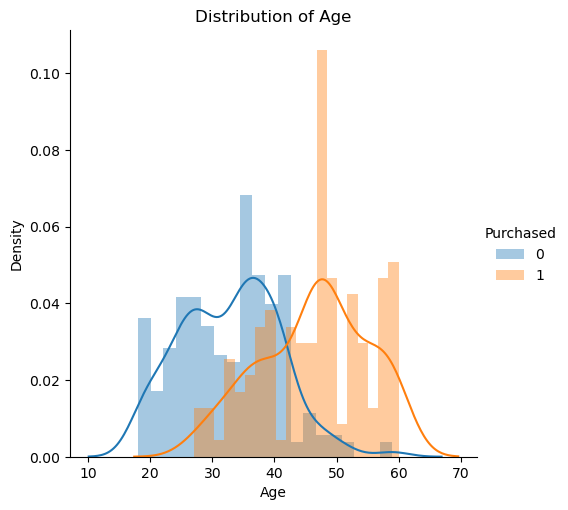

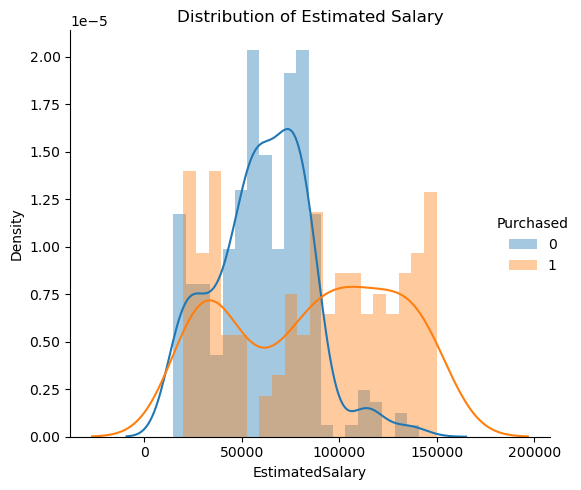

''

In [9]:
sns.FacetGrid(ads, hue='Purchased', height=5) \
    .map(sns.distplot, 'Age', bins=20, kde=True) \
    .add_legend()
plt.title("Distribution of Age")

sns.FacetGrid(ads, hue='Purchased', height=5) \
    .map(sns.distplot, 'EstimatedSalary', bins=20, kde=True) \
    .add_legend()
plt.title("Distribution of Estimated Salary")
plt.tight_layout()  
plt.show()
;

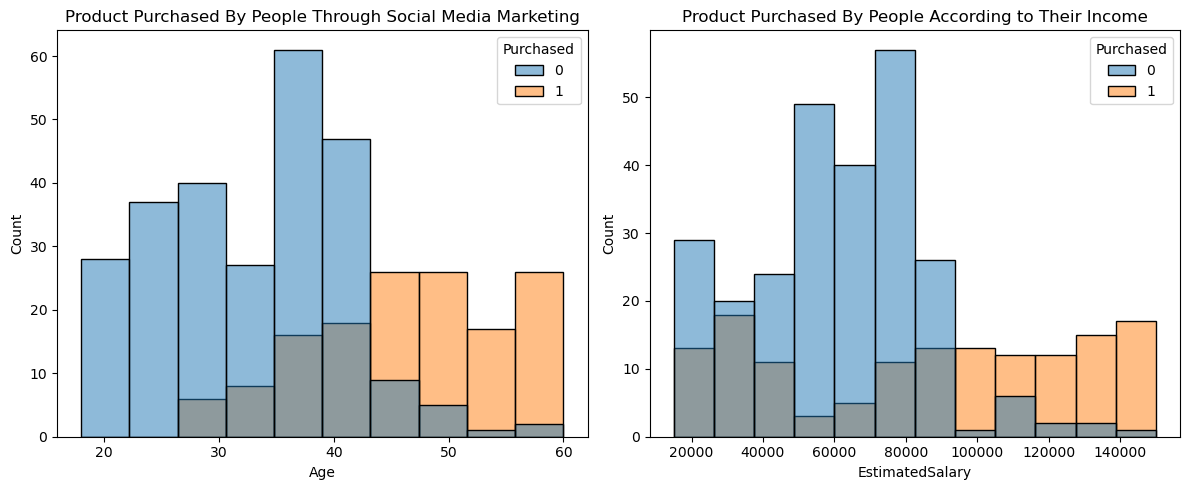

In [10]:
plt.rcParams['figure.figsize'] = (12, 5) 

plt.subplot(1,2,1)
sns.histplot(x="Age", hue="Purchased", data=ads)
plt.title("Product Purchased By People Through Social Media Marketing")

plt.subplot(1,2,2)
plt.title("Product Purchased By People According to Their Income")
sns.histplot(x="EstimatedSalary", hue="Purchased", data=ads)
plt.tight_layout()
plt.show();

In [17]:
plt.figure(figsize=(6,5))
purchase_count=ads['Purchased'].value_counts().sort_index()
sns.barplot(x=purchase_count.index,y=purchase_count.values,edgecolor='black')
plt.title("Total Purchased (yes/no) Counts");

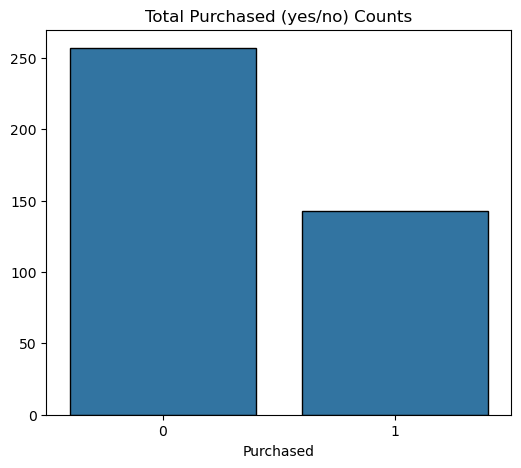

<Figure size 800x600 with 0 Axes>

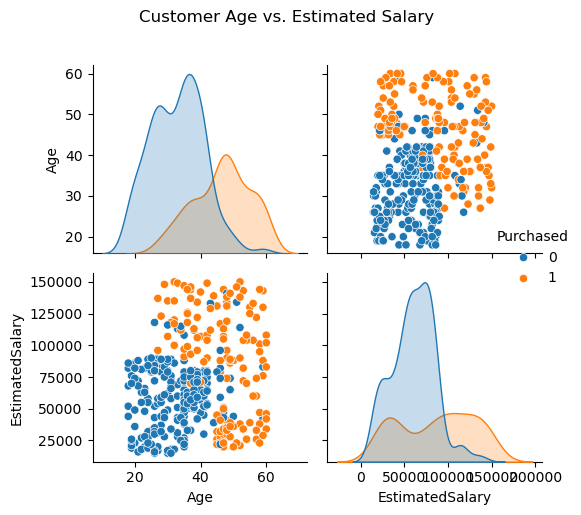

In [18]:
plt.figure(figsize=(8,6))
pairplot = sns.pairplot(ads, hue='Purchased')

fig = pairplot.fig
fig.suptitle("Customer Age vs. Estimated Salary", y=1.02, ha='center')
plt.tight_layout() 
plt.show();

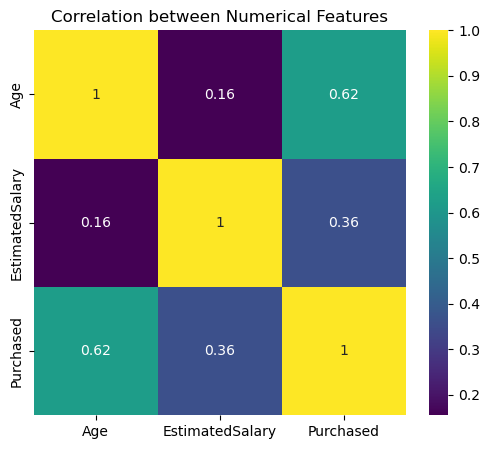

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(ads.corr(),annot=True,cmap='viridis')
plt.title("Correlation between Numerical Features")
plt.show();


SPLIT THE DATA


In [22]:
X = ads.drop(columns=['Purchased'])
y = ads['Purchased']

In [23]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.1,random_state=2)

In [24]:
print("The shape of X_train :",X_train.shape)
print("The shape of X_test :",X_test.shape)
print("The shape of y_train :",y_train.shape)
print("The shape of y_test :",y_test.shape)

The shape of X_train : (360, 2)
The shape of X_test : (40, 2)
The shape of y_train : (360,)
The shape of y_test : (40,)


Train the Model

In [25]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=500)

In [26]:
logit.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [27]:
y_pred_logit = logit.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
cm = confusion_matrix(y_pred_logit,y_test)
cm

array([[24,  4],
       [ 2, 10]], dtype=int64)

In [30]:
cr = classification_report(y_pred_logit,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.71      0.83      0.77        12

    accuracy                           0.85        40
   macro avg       0.82      0.85      0.83        40
weighted avg       0.86      0.85      0.85        40



Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)

In [32]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [33]:
y_pred_dtc = dtc.predict(X_test)

In [34]:
cm = confusion_matrix(y_pred_dtc,y_test)
cm

array([[24,  1],
       [ 2, 13]], dtype=int64)

In [35]:
cr = classification_report(y_pred_dtc,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.93      0.87      0.90        15

    accuracy                           0.93        40
   macro avg       0.93      0.91      0.92        40
weighted avg       0.93      0.93      0.92        40

